In [49]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import cv2

In [50]:
#getting our data
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [51]:
len(X_train)

60000

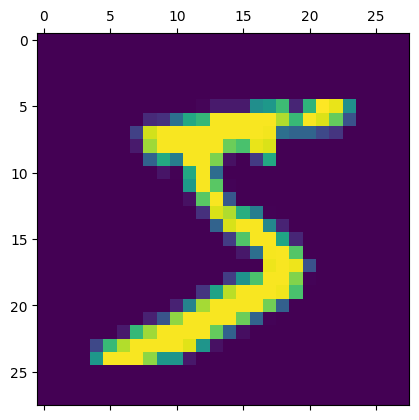

In [52]:
plt.matshow(X_train[0])

In [53]:
X_train = tf.keras.utils.normalize(X_train,axis=1)
X_test = tf.keras.utils.normalize(X_test,axis=1)

In [54]:
len(X_train[0])

28

In [55]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten layer to convert 2D input to 1D
    keras.layers.Dense(128, input_shape=(784,), activation='relu'),
    keras.layers.Dense(128, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, input_shape=(784,), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2606 - accuracy: 0.9242
Epoch 2/7
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1079 - accuracy: 0.9662
Epoch 3/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0725 - accuracy: 0.9776
Epoch 4/7
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0544 - accuracy: 0.9820
Epoch 5/7
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0396 - accuracy: 0.9872
Epoch 6/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0329 - accuracy: 0.9890
Epoch 7/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0248 - accuracy: 0.9921


In [56]:
loss , accuracy = model.evaluate(X_test, y_test)
loss 
accuracy

313/313 [==============================] - 0s 847us/step - loss: 0.1057 - accuracy: 0.9738


0.973800003528595

1/1 [==============================] - 0s 21ms/step
This digit is probably a 5


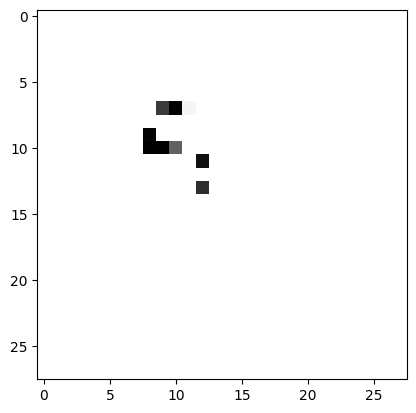

1/1 [==============================] - 0s 17ms/step
This digit is probably a 1


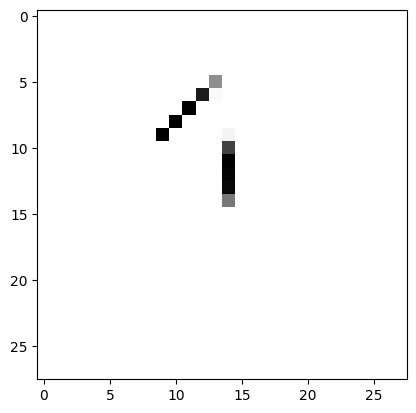

1/1 [==============================] - 0s 19ms/step
This digit is probably a 4


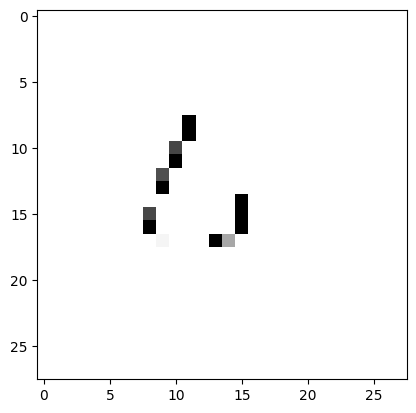

In [65]:
#model.save('handwritten.model')
#model= tf. keras.models.load_model('handwritten.model')
image_number = 1
while os.path.isfile(f"digits/digit{image_number}.png"):
    try:
        img = cv2.imread(f"digits/digit{image_number}.png", cv2.IMREAD_GRAYSCALE)  # Read image as grayscale
        img = cv2.resize(img, (28, 28))  # Resize image to (28, 28)
        img = np.invert(img) / 255.0  # Invert and normalize image
        img = np.expand_dims(img, axis=0)  # Add batch dimension
        prediction = model.predict(img)
        print (f"This digit is probably a {np.argmax (prediction)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print("error")
    finally:
        image_number +=1